### <p style="text-align: right;"> &#9989; Lukas Nolta</p>

# Homework #5: Practice with Machine Learning Classification (Individual)

<img src="https://miro.medium.com/max/2008/1*i3n0kZW7P6OxcUwTRTitSg.png" width=500px>

In this assignment, you'll work on finishing your perceptron binary classifier or find an example online that you can copy (with proper citation!), modify as necessary, and then run on the iris data file from class. If you already managed to get the perceptron model to work in class, you'll be asked to find a version online and compare it to your solution. The details of all of this are include in Part 1 in the text below.

After that you'll practice using scikit-learn to classify data using a classification model of your choosing. This should help you to become more comfortable with using scikit-learn, which may be helpful for you semester project, depending on what topic you chose to pursue.

**You are encouraged to read through the entire assignment before you start to make sure you understand what you're expected to do.**

### Goals for this assignment:

By the end of this assignment, you should be able to:

* Use the perceptron model to classify linearly separable data.
* Use one of the built-in classification models in scikit-learn to classify new data.

### Assignment instructions

**This assignment is due at 11:59pm on Friday, November 15th.** This is an individual assignment, but you should feel free to discuss issues you run into in the CMSE 202 "help" channel on Slack. When you're done, it should be uploaded into the "Homework Assignments" submission folder for Homework #5. Further submission instructions can be found at the end of the notebook.

### Grading

* Part 1: Completing and testing the perceptron model (10 points)
* Part 2: Using scikit-learn to classify data (20 points + 2 possible bonus points)

Total points: **30** (+2 possible bonus points)

---
## Part 1: Using the perceptron model to classify data



In your Day 15 in-class assignment you worked toward building the perceptron classifier from scratch. For this part of the homework assignment **you need to accomplish one of the following options**:

1. If you did not finish writing and testing your perceptron class and would like to do so, you should do that here. You should review the details of the perceptron model from the Day 15 in-class assignment. You should make sure that your classifier works with the `binary-iris.csv` file from class (which is also included in the homework directory of the assignments repository). You should also make the plot that shows the decision boundary along with the data (the steps for plotting the decision boundary are also included in the Day 15 in-class assignment).

2. If you did not finish writing and testing your perceptron class, but are not confident that you were headed down the path with designing your method, you are encourage to find an example on the internet, reproduce it here, cite your source, and run the classifier on the `binary-iris.csv` file from class. Once you get the code working, you should make sure you produce a plot that displays the data and a line for the decision boundary (as described in the in-class assignment).

3. If you *did* get your perceptron model working, reproduce it here and confirm that it produces the expected decision boundary by producing a plot. In addition to this, find some example Python code for the perceptron model online, provide a link to the example, review the approach used in the example, and highlight how the approach differed from your approach. Is there anything from the example that you think is better than your solution? Anything that you think is worse? Include this discussion in your assignment.

**Which of the above three options are you completing for this assignment?**

I think I will go with option #2 for this part of the assignment.

### Details for building and training the model

Remember, when you train the model, you should only use ~75% of the available data as training data and reserve the remaining 25% to performing testing. Once you have a working model, you should **include a test to ensure that the model produces the right classifications on some for you testing data**.

You should use the `binary-iris.csv` file contained within the homework directory as your training and testing data.

Once everything is working, make sure you plot the data and the decision boundary for your model. 

**The details for the perceptron model, the suggestions for how to build a class from scratch, and the details for plotting the decision boundary are all included in the Day 15 in-class assignment. Use that assignment as a reference when creating your final solution**.

If you decide to use an example from the internet, **make sure to include a proper citation or link to the source!** If you do not, you will not receive full points.

100

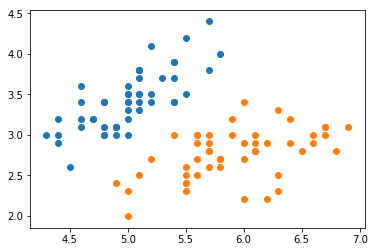

In [22]:
# Put your code here
import numpy as np
import pandas as pd
iris_data = pd.read_csv('binary-iris.csv',skiprows = 1,  header = None)
import matplotlib.cm as cm
iris_data
import matplotlib.pyplot as plt
sepal_length =iris_data[0]
sepal_width = iris_data[1]
sepal_l_sertosa = sepal_length[0:50]
sepal_l_versicolor = sepal_length[51:100]

sepal_w_sertosa = sepal_width[0:50]
sepal_w_versicolor = sepal_width[51:100]

plt.scatter(sepal_l_sertosa,sepal_w_sertosa)
plt.scatter(sepal_l_versicolor, sepal_w_versicolor)
len(iris_data[2])

In [25]:
f = open("binary-iris.csv")
header = next(f) # dump the header line
data = []
for line in f:
    fields = line.split(",")
    # need to strip label because, as the last element, it has a \n
    label = (1.0 if fields[2].strip() == "Iris-setosa" else -1.0)
    # the fields are strings until we conver them
    data.append([float(fields[0]), float(fields[1]), label])
f.close()

class perceptron:
    
    def __init__(self,no_of_inputs,tv = .01,epochs = 10):
        self.tv = tv
        self.epochs = epochs
        self.weights = np.zeros(no_of_inputs + 1)
        
    def predict(self,inputs):
        summation = np.dot(inputs,self.weights[1:]) + self.weights[0]
        if summation > 0:
            activation = 1
        else:
            activation = -1
        return activation
    def training(self,training_inputs, label):
        for _ in range(self.epochs):
            for inputs, labels in zip(training_inputs, label):
                prediction = self.predict(inputs)
                self.weights[1:] += self.tv * (labels - prediction) * inputs
                self.weights[0] += self.tv * (labels - prediction)
data_array = np.array(data)
np.random.shuffle(data_array)
training_inputs = data_array[0:80,0:2]
training_inputs
label = data_array[0:80,2:3]




In [26]:
P2 = perceptron(2)
P2.training(training_inputs,label)
test_inputs = data_array[81:100,0:2]
test_ans = data_array[81:100,2:3]
test_ans2 = list(test_ans)
results = []
for i in test_inputs:
    ans = P2.predict(i)
    results.append(ans) 
correct = 0
incorrect = 0
for i in range(len(test_ans)):
    if results[i] == test_ans2[i]:
        print('yay')
        correct += 1
    else:
        print('sad')
        incorrect += 1
print(correct/19)

yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
yay
1.0


https://medium.com/@thomascountz/19-line-line-by-line-python-perceptron-b6f113b161f3 
This is the only real resource I used to complete my perceptron model.

<font size=30> &#9998;</font> If you chose "Option 3" from above, make sure to include a discussion of how your solution differed from the solution you found line.

---
## Part 2: Classifying data using scikit-learn

This part of the assignment is intentionally a bit open-ended to give you the opportunity to chose a dataset that you find interesting and practice using a classification method from [scikit-learn](http://scikit-learn.org/stable/), one of the most commonly used packages for doing machine learning in Python.

For this part of the assignment, you are tasked with choosing an available dataset from the [University of California Irvine Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php) and performing a classification on it using scikit-learn. Not only are you allowed to choose the dataset you want to use, but you can also choose which machine learning classification scheme you want to use. scikit-learn offers [many classification options](http://scikit-learn.org/stable/supervised_learning.html#supervised-learning) and you can see that they generate [many different types of decision boundaries](http://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html).

When choosing a dataset, you should make sure to choose a dataset that is well-suited for performing classification. Luckily, the UCI repository [makes this easy](https://archive.ics.uci.edu/ml/datasets.php?format=&task=cla&att=&area=&numAtt=&numIns=&type=&sort=nameUp&view=table).

For this part of the assignment, **you need to**:

* Choose and link to a dataset from the UCI machine learning repository
* Choose a classification method from the availables options in scikit-learn
* Build your classifier by training the model
* Test you classifier to determine its accuracy
* Bonus points: visualize the decision boundaries of your classifier. (this part can be tricky, so it is not required that you get it working, but you will receive 2 extra points if you do)

**Make sure your upload your chosen dataset to D2L along with your notebook or include a command to download the file within the notebook!**

In [ ]:
# Put your code here


---
## Assignment wrap-up

Please fill out the form that appears when you run the code below.  **You must completely fill this out in order to receive credit for the assignment!**

In [ ]:
from IPython.display import HTML
HTML(
"""
<iframe 
	src="https://forms.gle/v9KeKoSf8d5qi7PB8" 
	width="800px" 
	height="600px" 
	frameborder="0" 
	marginheight="0" 
	marginwidth="0">
	Loading...
</iframe>
"""
)

___
# Congrats, you're done!

Upload a copy of this notebook to the "Homework 5" submission folder on D2L.